<module 'matplotlib.pyplot' from '/home/jmoon/.conda/envs/ai/lib/python3.11/site-packages/matplotlib/pyplot.py'>

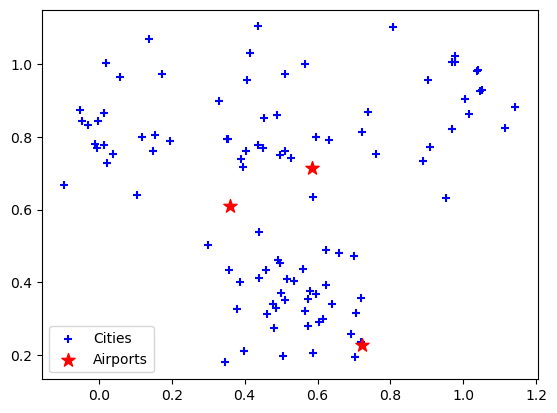

In [ ]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

# Generate 100 random cities
# These locations will not be changed
for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))

# Generate intitial random locations for 3 airports
for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y)) 

# Plot the initial state of the problem
import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [ ]:
# Step size - small positive constant
alpha = 0.005

# Number of repeat times
iterations = 20

# Create a set of closest cities for each airport
cities_a1 = set()
cities_a2 = set()
cities_a3 = set()

# Compute the objective function
# Results are stored in fs for plotting
# Return the objective function value
def objective_function(airport, cities, fs):
    obj_func = 0
    for city in cities:
        obj_func += ((airport[0] - city[0]) ** 2) + ((airport[1] - city[1]) ** 2)
    return obj_func

# Get the gradient values
# Multiply it by 2 in order to move the airports closer
def gradient(airport, cities):
    dx = 0
    dy = 0
    for city in cities:
        dx += airport[0] - city[0]
        dy += airport[1] - city[1]
    dx *= 2
    dy *= 2

    return dx, dy

# Generate the closet cities set correspoding for each airport
def get_closest_cities(cities):
    for city in cities:
        distance_a1 = ((airports[0][0] - city[0]) ** 2) + ((airport[0][0] - city[1]) ** 2)
        distance_a2 = ((airports[1][0] - city[0]) ** 2) + ((airport[1][0] - city[1]) ** 2)
        distance_a3 = ((airports[2][0] - city[0]) ** 2) + ((airport[2][0] - city[1]) ** 2)

        if (distance_a1 < distance_a2 and distance_a1 < distance_a3):
            cities_a1.add(city)
        elif (distance_a2 < distance_a1 and distance_a2 < distance_a3):
            cities_a2.add(city)
        else:
            cities_a3.add(city)
    
    return cities_a1, cities_a2, cities_a3

# Create an empty list that will hold the objective function value
fs = []

for i in range(iterations):
    # Update the set of closest cities for each airport
    cities_a1, cities_a2, cities_a3 = get_closest_cities(cities)

    # Calculate the objective function
    objective_total = objective_function(airports[0], cities_a1, fs) + objective_function(airports[1], cities_a2, fs) + objective_function(airports[2], cities_a3, fs)
    fs.append(objective_total)

    # Calculate the gradient by taking the derivative of each coordinate
    a1_x, a1_y = gradient(airport[0], cities_a1)
    a2_x, a2_y = gradient(airport[1], cities_a2)
    a3_x, a3_y = gradient(airport[2], cities_a3)

    # Update airports' location
    airports[0] = (airports[0][0] - alpha * a1_x, airports[0][1] - alpha * a1_y)
    airports[1] = (airports[1][0] - alpha * a2_x, airports[1][1] - alpha * a2_y)
    airports[3] = (airports[2][0] - alpha * a3_x, airports[2][1] - alpha * a3_y)

    # Clear the set of closest cities of each airport after every trial
    cities_a1.clear()
    cities_a2.clear()
    cities_a3.clear()


# Plot the final state space
zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt

In [ ]:
# Plot the fs values over the given range
# x is the number of iterations
# y is the objective function value over time
xs = [x for x in range(len(fs))]
ys = [y for y in fs]
plt.scatter(xs, ys)